In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.integrate as si
import numpy as np
from scipy.signal import find_peaks
import time
from datetime import datetime
from matplotlib import collections as matcoll
from pylab import rcParams

In [2]:
sns.set()
rcParams['figure.figsize'] = 10, 5

In [3]:
def data_frame(event):
    return pd.read_csv(event)

In [4]:
event4 = data_frame('C:\\Users\\krsai\\OneDrive\\Desktop\\Honk data\\drive-download-20200328T072000Z-001\\TEST2\\TEST2\\REALME\\BIKE 28Dec,2019-11-09-44 AM\\Testing Data\\All_Details2.csv')
event4.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.110,3.435,9.264,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586053
1,0.087,3.503,9.229,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586054
2,0.090,3.450,9.243,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586065
3,0.039,3.492,9.257,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586066
4,0.072,3.448,9.326,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586067


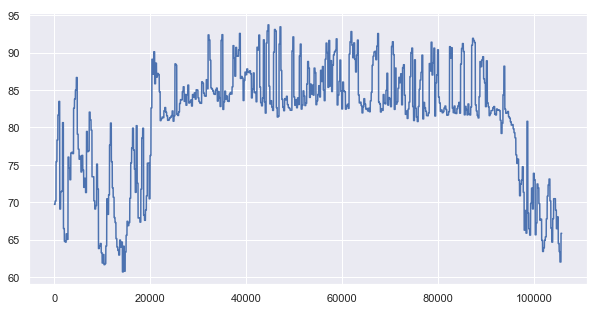

In [5]:
plt.plot(event4.sound)

In [6]:
def time(event):
    date_time = []
    for index in event.index:
        p = pd.Timestamp(event.timestamp.loc[index],unit='ms',tz='Asia/Kolkata')
        date_time.append(p.time())
        
    time = []
    for i in range(len(date_time)):
        a = ((date_time[i].hour*3600 + date_time[i].minute*60 + date_time[i].second) + date_time[i].microsecond*10**(-6))
        time.append(a)
        
    ar = np.array(time)
    event['time'] = ar
        
    return event

In [7]:
event4 = time(event4)
event4.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.110,3.435,9.264,23.555063,87.29839,0.0,69.713882,19255,40186.053,1577511586053
1,0.087,3.503,9.229,23.555063,87.29839,0.0,69.713882,19255,40186.054,1577511586054
2,0.090,3.450,9.243,23.555063,87.29839,0.0,69.713882,19255,40186.065,1577511586065
3,0.039,3.492,9.257,23.555063,87.29839,0.0,69.713882,19255,40186.066,1577511586066
4,0.072,3.448,9.326,23.555063,87.29839,0.0,69.713882,19255,40186.067,1577511586067


In [8]:
event4.time[len(event4)-1]-event4.time[0]

264.247000000003

## distance

In [9]:
def distance(event,a1,a2):
    R = 6371
    lat1 = math.radians(event.latitude[a1])
    lon1 = math.radians(event.longitude[a1])

    lat2 = math.radians(event.latitude[a2])
    lon2= math.radians(event.longitude[a2])

    d_lat = lat2 - lat1
    d_lon = lon2 - lon1

    t_s1 = event.time[a1]
    t_s2 = event.time[a2]
    d_t_s = (t_s2-t_s1)
    
    a = math.sin(d_lat / 2.0) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(d_lon / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    dis = c * R
    
    return dis,d_t_s

## velocity

In [10]:
total_dis,total_time = distance(event4,0,len(event4)-1)
total_vel = total_dis/(total_time/3600)
total_time,total_dis,total_vel

(264.247000000003, 1.7839697987955117, 24.30412180900358)

## window

In [11]:
def window(x,event):
    last_check = 0
    window = []

    nums = []
    for i in range(1,100):
        nums.append(i*x)

    for index in nums:
        window.append(event.loc[last_check:index-1])
        last_check = index
    return window

## honk count

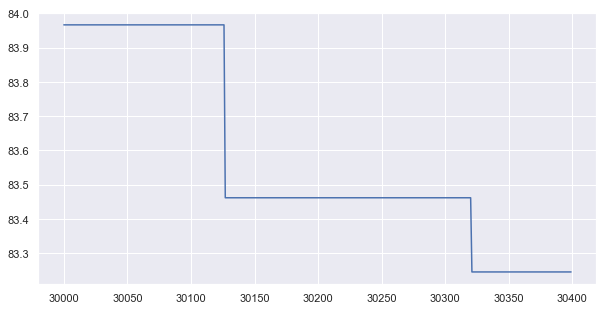

In [12]:
plt.plot(event4.sound[30000:30400])

In [13]:
event4.time[30320]-event4.time[30125]

0.4850000000005821

In [14]:
def honk_indexing(event,n):
    initial_p=[]
    end_p=[]
    total_honk=0
    for i,j in zip(window(n,event)[0:100], range(len(window(n,event)[0:100]))):
        c=0
        ma = np.amax(i.sound)
        if(ma>90):
            for k in i.sound:
                if(k == ma):
                    c += 1
            initial_p.append(np.argmax(i.sound))
            end_p.append(np.argmax(i.sound)+c)  
    
        if(ma>90):
            total_honk += 1
    return initial_p,end_p,total_honk;

In [19]:
initial_p,end_p,total_honk = honk_indexing(event4,1000)
# initial_p,end_p,total_honk

In [16]:
def honk_dur_dis_vel(event):
    dis=[]
    dur=[]
    vel=[]
    for i,j in zip(initial_p,end_p):
        d,t=distance(event,i,j)
        dis.append(d)
        dur.append(t)
        v = d/(t/3600)
        vel.append(v)
    return dis,dur,vel

In [20]:
honk_dis,honk_dur,honk_vel = honk_dur_dis_vel(event4)
# honk_dis,honk_dur,honk_vel

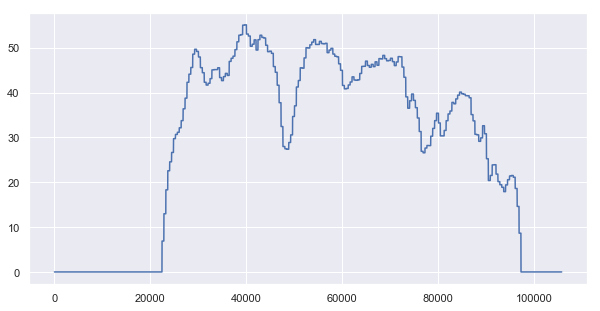

In [27]:
plt.plot(event4.speed)

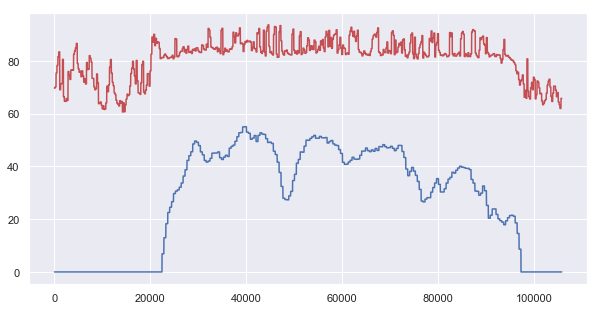

In [24]:
plt.plot(event4.sound, 'r', event4.speed, 'b')